In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys, os, pathlib
import numpy as np
import pandas as pd
import xarray as xr
import nibabel as nib
import matplotlib.pyplot as plt
import seaborn as sns

# Directory exploration

In [3]:
!pwd

/ocean/projects/asc170022p/mtragoza/lung-project/notebooks


In [4]:
!ls -l /ocean/projects/asc170022p/shared/Data/COPDGene

total 612
drwxrwxr-x+    13 batmangh asc170022p   4096 Apr 12 10:35 ClinicalData
drwxrwxr-x+     3 batmangh asc170022p   4096 Nov  2  2022 ClinicalPatches
drwxrwxr-x+     5 batmangh asc170022p   4096 Nov  2  2022 CuratedFeatures
drwxrwxr-x+     2 batmangh asc170022p   4096 Nov  2  2022 Database
drwxrwxr-x+     6 batmangh asc170022p   4096 Nov  2  2022 GeneticGenomicData
drwxrwxr-x+     3 batmangh asc170022p   4096 Nov  2  2022 Genetics-OldData
drwxrwxr-x+ 10786 batmangh asc170022p 520192 Nov  2  2022 Images
drwxrwxr-x+  1323 batmangh asc170022p  65536 Nov  2  2022 Images_bpollack
drwxr-xr-x      3 batmangh asc170022p   4096 Nov  2  2022 LI_INSP_ATLAS
drwxrwxr-x+     3 batmangh asc170022p   4096 Nov  2  2022 lobeSegmentation-tarFiles


In [5]:
!ls -l /ocean/projects/asc170022p/shared/Data/COPDGene/ClinicalData

total 120
drwxrwxr-x+ 4 batmangh asc170022p  4096 Nov  2  2022  CT_scan_datasets
drwxrwxr-x+ 2 batmangh asc170022p  4096 Nov  2  2022  CurrentVersionMOP
drwxrwxr-x+ 2 batmangh asc170022p  4096 Apr 12 10:38  FinalPhase1-Status2017
-rw-rwxr--+ 1    67012 asc170022p 74419 Feb  2  2021  Home.htm
drwxrwxr-x+ 2 batmangh asc170022p  4096 Nov  2  2022  Home_files
drwxrwxr-x+ 2 batmangh asc170022p  4096 Nov  2  2022  Longitudinal_Follow-up
drwxrwxr-x+ 2 batmangh asc170022p  4096 Nov  2  2022  MortalitySurvivalAnalysis
drwxrwxr-x+ 4 batmangh asc170022p  4096 Nov  2  2022 'P1-P2 First 5K Long Data'
drwxr-xr-x+ 2 batmangh asc170022p  4096 Nov  2  2022  P1-P2-P3_10k
drwxrwxr-x+ 7 batmangh asc170022p  4096 Nov  2  2022  Special_Dataset
drwxr-xr-x  2 batmangh asc170022p  4096 Nov  2  2022  Subtyping
drwxrwxr-x+ 4 batmangh asc170022p  4096 Nov  2  2022  phase1_Final_10K


In [6]:
!ls -l /ocean/projects/asc170022p/shared/Data/COPDGene/ClinicalData/phase1_Final_10K

total 8
drwxrwxr-x+ 4 batmangh asc170022p 4096 Nov  2  2022 'phase 1 Pheno'
drwxrwxr-x+ 2 batmangh asc170022p 4096 Nov  2  2022 'phase 1 separate ILD:Bronchiectasis'


In [7]:
!ls -l /ocean/projects/asc170022p/shared/Data/COPDGene/ClinicalData/phase1_Final_10K/'phase 1 Pheno'

total 10380
-rw-rwxr--+ 1 batmangh asc170022p   124986 Feb 16  2021  COPDGene_Final_Cohort_Info_for_Investigators_04.16.2012.pdf
-rw-rwxr--+ 1 batmangh asc170022p    30453 Feb 16  2021  Final10000_DataDictionary_31Aug16.xlsx
-rw-rwxr--+ 1 batmangh asc170022p 10457700 Feb 16  2021  Final10000_Phase1_Rev_28oct16.txt
drwxrwxr-x+ 2 batmangh asc170022p     4096 Nov  2  2022 'phase 1 Imbio PRM'
drwxrwxr-x+ 2 batmangh asc170022p     4096 Feb 16  2021 'phse 1 BDR, revised'


In [8]:
!head -n1 /ocean/projects/asc170022p/shared/Data/COPDGene/ClinicalData/phase1_Final_10K/'phase 1 Pheno'/Final10000_Phase1_Rev_28oct16.txt

sid	ccenter	distwalked	O2_suppl_6MW	Walk_Course	Walk_Limit	WalkSymp_BackPain	WalkSymp_JointPain	WalkSymp_Legs_Fatigue	WalkSymp_ShortnessBreath	QA_CalciumCalPad	scanner	FinalApproval	CTMissing_Reason	diasBP	gender	HR	O2_Hours_Day	O2_Therapy	O2_Years	Resting_SaO2	SysBP	Weight_KG	Height_CM	BMI	O2use_rest	O2use_exercise	O2use_sleep	race	ethnic	Blood_Other_Use	HealthStatus	CancerBladder	CancerBreast	CancerColon	CancerLung	CancerProstate	Angina	CongestHeartFail	CoronaryArtery	Diabetes	HighBloodPres	HighCholest	Pneumothorax	HeartAttack	BloodClots	MacularDegen	PeriphVascular	stroke	TIA	GastroEsophReflx	StomachUlcers	CompressFracBack	HipFracture	OsteoArth	Osteoporosis	RheumArth	StiffPainLimitWk	StiffPainBack	LimitWalkMost	CABG	Angioplasty	Alpha1Test	PhenoGenotype	PhenoGenoDK	PhenoGenoMGLevel	PhenoGenoMoleL	HowSoonSmoke	SmokeMore2hrs	CigHateGiveUp	FindHardNotSmoke	SmokeSickBed	SmokeMenthol	PainfulJoints	LowerBackPain	PainJointType_Shoulder	PainJointType_Elbow	PainJointType_Wrist	PainJointType_Hi

In [9]:
!ls -1 /ocean/projects/asc170022p/shared/Data/COPDGene/Images

00001F
00002F
00003F
00004F
10002K
10004O
10005Q
10006S
10008W
10009Y
10010J
10011L
10012N
10013P
10014R
10015T
10017X
10020M
10022Q
10023S
10025W
10028C
10031R
10032T
10034X
10035Z
10041U
10047G
10049K
10051X
10052Z
10055F
10056H
10057J
10058L
10060Y
10062C
10064G
10065I
10067M
10068O
10070B
10071D
10072F
10075L
10076N
10077P
10081G
10083K
10085O
10086Q
10087S
10088U
10089W
10090H
10091J
10092L
10093N
10094P
10096T
10097V
10098X
10099Z
10100K
10101M
10102O
10104S
10105U
10106W
10107Y
10109C
10110N
10111P
10114V
10115X
10116Z
10120Q
10123W
10124Y
10125A
10126C
10127E
10129I
10130T
10131V
10132X
10133Z
10134B
10136F
10137H
10138J
10141Y
10146I
10151B
10153F
10154H
10155J
10157N
10160C
10161E
10163I
10164K
10165M
10166O
10168S
10169U
10170F
10171H
10178V
10179X
10180I
10181K
10182M
10184Q
10185S
10186U
10188Y
10189A
10190L
10191N
10192P
10193R
10196X
10197Z
10199D
10200O
10201Q
10203U
10205Y
10206A
10207C
10208E
10209G
10210R
10211T
10212V
10213X
10214Z
10215B
10216D
10217F
10222Y
10223A

In [10]:
!ls -l /ocean/projects/asc170022p/shared/Data/COPDGene/Images/20155P/

total 8
drwxrwxr-x+ 10 batmangh asc170022p 4096 Nov  2  2022 Phase-1
drwxrwxr-x+  8 batmangh asc170022p 4096 Nov  2  2022 Phase-2


In [11]:
!ls -l /ocean/projects/asc170022p/shared/Data/COPDGene/Images/20155P/Phase-1

total 32
drwxrwxr-x+ 3 batmangh asc170022p 4096 Nov  2  2022 CIP-LobeSegmentation
drwxrwxr-x+ 6 batmangh asc170022p 4096 Nov  2  2022 DICOM
drwxrwxr-x+ 2 batmangh asc170022p 4096 Nov  2  2022 Isotropic
drwxrwxr-x+ 4 batmangh asc170022p 4096 Nov  2  2022 LobeSegmentation
drwxrwxr-x+ 2 batmangh asc170022p 4096 Nov  2  2022 RAW
drwxrwxr-x+ 2 batmangh asc170022p 4096 Nov  2  2022 Subject2Vec
drwxrwxr-x+ 4 batmangh asc170022p 4096 Nov  2  2022 SuperVoxels
drwxr-xr-x  4 batmangh asc170022p 4096 Nov  2  2022 Transformations


In [12]:
!ls -l /ocean/projects/asc170022p/shared/Data/COPDGene/Images/20155P/Phase-1/RAW

total 595784
-rw-rwxr--+ 1 batmangh asc170022p       683 Feb 17  2021 20155P_EXP_SHARP_HAR_COPD.json
-rw-rwxr--+ 1 batmangh asc170022p 147178450 Feb 17  2021 20155P_EXP_SHARP_HAR_COPD.nii.gz
-rw-rwxr--+ 1 batmangh asc170022p       679 Feb 17  2021 20155P_EXP_STD_HAR_COPD.json
-rw-rwxr--+ 1 batmangh asc170022p 142286454 Feb 17  2021 20155P_EXP_STD_HAR_COPD.nii.gz
-rw-rwxr--+ 1 batmangh asc170022p       704 Feb 17  2021 20155P_INSP_SHARP_HAR_COPD.json
-rw-rwxr--+ 1 batmangh asc170022p 167437495 Feb 17  2021 20155P_INSP_SHARP_HAR_COPD.nii.gz
-rw-rwxr--+ 1 batmangh asc170022p       700 Feb 17  2021 20155P_INSP_STD_HAR_COPD.json
-rw-rwxr--+ 1 batmangh asc170022p 153150446 Feb 17  2021 20155P_INSP_STD_HAR_COPD.nii.gz


In [13]:
!cat /ocean/projects/asc170022p/shared/Data/COPDGene/Images/20155P/Phase-1/RAW/20155P_EXP_SHARP_HAR_COPD.json

{
	"Modality": "CT",
	"Manufacturer": "GE",
	"ManufacturersModelName": "LightSpeed_VCT",
	"StationName": "vct1",
	"PatientPosition": "FFS",
	"ProcedureStepDescription": "COPD",
	"SoftwareVersions": "07MW18.4",
	"SeriesDescription": "20155P_EXP_SHARP_HAR_COPD",
	"ProtocolName": "20155P_EXP_SHARP_HAR_COPD",
	"ScanOptions": "HELICAL_MODE",
	"ImageType": ["ORIGINAL", "PRIMARY", "AXIAL"],
	"SeriesNumber": 5,
	"AcquisitionTime": "11:58:54.000000",
	"AcquisitionNumber": 1,
	"ReconMatrixPE": 512,
	"ImageOrientationPatientDICOM": [
		1,
		0,
		0,
		0,
		1,
		0	],
	"ConversionSoftware": "dcm2niix",
	"ConversionSoftwareVersion": "v1.0.20180622 (JP2:OpenJPEG) (JP-LS:CharLS) GCC5.5.0"
}


In [14]:
!ls /ocean/projects/asc170022p/shared/Data/COPDGene/Images/20155P/Phase-1/LobeSegmentation/

20155P_EXP_STD_HAR_COPD  20155P_INSP_STD_HAR_COPD


In [15]:
!ls /ocean/projects/asc170022p/shared/Data/COPDGene/Images/20155P/Phase-1/LobeSegmentation/20155P_INSP_STD_HAR_COPD

Airways.mhd  Airways.zraw  Histograms.csv  Lobes.mhd  Lobes.zraw


# Visualize clinical data

In [16]:
# load clinical data file
data_root = pathlib.Path('/ocean/projects/asc170022p/shared/Data/COPDGene')
data_file = data_root / 'ClinicalData/phase1_Final_10K/phase 1 Pheno/Final10000_Phase1_Rev_28oct16.txt'

df_clinical = pd.read_csv(data_file, sep='\t', low_memory=False)
df_clinical

sid ccenter  distwalked  O2_suppl_6MW  Walk_Course  Walk_Limit  \
0      10002K     BWH       978.0           0.0          1.0         0.0   
1      10004O     BWH      1166.0           NaN          1.0         0.0   
2      10005Q     NJC      1765.0           0.0          1.0         0.0   
3      10006S     BWH      1147.0           2.0          1.0         0.0   
4      10008W     NJC      1305.0           0.0          1.0         0.0   
...       ...     ...         ...           ...          ...         ...   
10301  26180S     HAR       300.0           0.0          1.0         1.0   
10302  26181U     UAB       636.0           0.0          1.0         1.0   
10303  26182W     PIT      1355.0           0.0          1.0         1.0   
10304  26183Y     TXS      1590.0           0.0          2.0         1.0   
10305  26185C     TXS      1415.0           0.0          2.0         0.0   

       WalkSymp_BackPain  WalkSymp_JointPain  WalkSymp_Legs_Fatigue  \
0                    NaN                 NaN                    NaN   
1                    NaN                 NaN                    NaN   
2                    NaN                 NaN                    NaN   
3                    NaN                 NaN                    NaN   
4                    NaN                 NaN                    NaN   
...                  ...                 ...                    ...   
10301                1.0                 1.0                    1.0   
10302                0.0                 0.0                    0.0   
10303                0.0                 0.0                    0.0   
10304                0.0                 0.0                    1.0   
10305                NaN                 NaN                    NaN   

       WalkSymp_ShortnessBreath  ...  pre_FEF2575 ATS_ERS deltaFEV1  deltaFVC  \
0                           NaN  ...        0.149     6.0    -0.021     0.012   
1                           NaN  ...        0.331     5.0     0.175     0.159   
2                           NaN  ...        3.156     0.0    -0.257    -0.171   
3                           NaN  ...        0.295     4.0    -0.010     0.174   
4                           NaN  ...        2.286     0.0    -0.094    -0.191   
...                         ...  ...          ...     ...       ...       ...   
10301                       1.0  ...        1.493     0.0     0.144    -0.012   
10302                       1.0  ...        0.477     5.0    -0.084    -0.038   
10303                       1.0  ...        1.268     0.0     0.089     0.192   
10304                       0.0  ...        2.149     0.0     0.180    -0.038   
10305                       NaN  ...        1.471     0.0     0.012     0.123   

       BDR_pct_FEV1  BDR_pct_FVC  BDR  NewGOLD_SGRQ  Visit_Year  \
0         -3.392569     0.632244  0.0            D1        2007   
1         17.676768     5.117477  0.0            D1        2007   
2         -8.086847    -4.300805  0.0             A        2008   
3         -0.770416     6.109551  0.0             B        2008   
4         -3.321555    -5.094692  0.0             A        2008   
...             ...          ...  ...           ...         ...   
10301      7.912088    -0.497719  0.0             B        2011   
10302     -4.976303    -1.285086  0.0            D1        2011   
10303      5.870712     9.701870  0.0             B        2011   
10304      6.085193    -0.961052  0.0             A        2011   
10305      0.507185     3.732929  0.0             A        2011   

       RandomGroupCode  
0                  9.0  
1                  7.0  
2                  5.0  
3                 10.0  
4                  6.0  
...                ...  
10301              6.0  
10302              8.0  
10303              4.0  
10304              2.0  
10305              2.0  

[10306 rows x 345 columns]

In [17]:
# select columns for descriptive analysis

subj_col_name = 'sid'     # subject ID
site_col_name = 'ccenter' # clinical site name
kern_col_name = 'kernel'  # reconstruction kernel

emph_cat_col_name = 'Emphysema'       # categorical emphysema variable
emph_pct_col_name = 'pctEmph'         # percent emphysema using VIDA
emph_pct2_col_name = 'pctEmph_Slicer' # percent emphysema using Slicer

fev_col_name = 'FEV1pp_utah'       # forced expiratory volume in 1 second
fvc_col_name = 'FVCpp_utah'        # forced vital capacity percent predicted
fev_fvc_col_name = 'FEV1_FVC_utah' # ratio of FEV1 to FVCpp

gold_col_name = 'finalGold' # GOLD score (categorical)

selected_columns = [
    subj_col_name,
    site_col_name,
    kern_col_name,
    emph_cat_col_name,
    emph_pct_col_name,
    emph_pct2_col_name,
    fev_col_name,
    fvc_col_name,
    fev_fvc_col_name,
    gold_col_name,
]
df_clinical = df_clinical[selected_columns].dropna()
df_clinical

sid ccenter kernel  Emphysema  pctEmph  pctEmph_Slicer  FEV1pp_utah  \
2      10005Q     NJC    STD          0   0.9819          0.8783        112.3   
3      10006S     BWH    STD          1  14.1939         13.7448         51.7   
7      10011L     BWH    STD          0   2.3425          2.2143         72.2   
9      10013P     BWH    STD          1   9.9594          9.4883         61.4   
12     10017X     BWH    STD          1  36.4779         35.8757         80.6   
...       ...     ...    ...        ...      ...             ...          ...   
10301  26180S     HAR    STD          0   0.1768          0.1710         90.9   
10302  26181U     UAB    STD          1  11.9066         11.6736         46.0   
10303  26182W     PIT    STD          0   0.5064          0.4673         81.5   
10304  26183Y     TXS    STD          0   0.4757          0.4274         94.8   
10305  26185C     TXS    STD          0   2.2792          2.1001         80.1   

       FVCpp_utah  FEV1_FVC_utah  finalGold  
2           114.6           0.77        0.0  
3            93.3           0.43        2.0  
7            82.9           0.66        2.0  
9           106.6           0.44        2.0  
12          104.9           0.57        1.0  
...           ...            ...        ...  
10301        87.6           0.82        0.0  
10302        64.6           0.55        3.0  
10303        86.5           0.74        0.0  
10304        95.3           0.80        0.0  
10305        90.9           0.70        0.0  

[8769 rows x 10 columns]

In [18]:
# create derived columns

emph_cat2_col_name = 'catEmph'

derived_columns = [
    emph_cat2_col_name
]
final_columns = selected_columns + derived_columns

df_clinical[emph_cat2_col_name] = pd.cut(
    df_clinical[emph_pct_col_name],
    bins=[0, 5, 10, 20, 100],
    labels=['normal', 'mild', 'moderate', 'severe']
)
df_clinical

sid ccenter kernel  Emphysema  pctEmph  pctEmph_Slicer  FEV1pp_utah  \
2      10005Q     NJC    STD          0   0.9819          0.8783        112.3   
3      10006S     BWH    STD          1  14.1939         13.7448         51.7   
7      10011L     BWH    STD          0   2.3425          2.2143         72.2   
9      10013P     BWH    STD          1   9.9594          9.4883         61.4   
12     10017X     BWH    STD          1  36.4779         35.8757         80.6   
...       ...     ...    ...        ...      ...             ...          ...   
10301  26180S     HAR    STD          0   0.1768          0.1710         90.9   
10302  26181U     UAB    STD          1  11.9066         11.6736         46.0   
10303  26182W     PIT    STD          0   0.5064          0.4673         81.5   
10304  26183Y     TXS    STD          0   0.4757          0.4274         94.8   
10305  26185C     TXS    STD          0   2.2792          2.1001         80.1   

       FVCpp_utah  FEV1_FVC_utah  finalGold   catEmph  
2           114.6           0.77        0.0    normal  
3            93.3           0.43        2.0  moderate  
7            82.9           0.66        2.0    normal  
9           106.6           0.44        2.0      mild  
12          104.9           0.57        1.0    severe  
...           ...            ...        ...       ...  
10301        87.6           0.82        0.0    normal  
10302        64.6           0.55        3.0  moderate  
10303        86.5           0.74        0.0    normal  
10304        95.3           0.80        0.0    normal  
10305        90.9           0.70        0.0    normal  

[8769 rows x 11 columns]

In [19]:
df_clinical[subj_col_name].nunique()

8769

In [20]:
df_clinical[site_col_name].unique()

array(['NJC', 'BWH', 'UIA', 'MSM', 'HAR', 'JHU', 'BAY', 'UAB', 'COL',
       'TXS', 'USD', 'HPR', 'TEM', 'FAL', 'PIT', 'DUK', 'UMC', 'UMN',
       'HVA', 'AVA', 'MVA'], dtype=object)

In [21]:
df_clinical[kern_col_name].unique()

array(['STD', 'B35F'], dtype=object)

In [22]:
# descriptive statistics of selected columns
df_clinical[final_columns].describe().T

count       mean        std      min      25%      50%  \
Emphysema       8769.0   0.430950   0.817830   0.0000   0.0000   0.0000   
pctEmph         8769.0   6.428300   9.827504   0.0065   0.6703   2.1704   
pctEmph_Slicer  8769.0   6.179283   9.647653   0.0037   0.5991   2.0090   
FEV1pp_utah     8769.0  77.085004  25.462290   9.5000  61.0000  81.3000   
FVCpp_utah      8769.0  87.497685  18.086121  22.6000  76.0000  88.2000   
FEV1_FVC_utah   8769.0   0.669587   0.161173   0.1500   0.5900   0.7200   
finalGold       8769.0   0.877865   1.465548  -2.0000   0.0000   0.0000   

                    75%       max  
Emphysema        1.0000    3.0000  
pctEmph          7.1353   61.4671  
pctEmph_Slicer   6.7185   61.9135  
FEV1pp_utah     95.6000  159.9000  
FVCpp_utah      99.5000  176.2000  
FEV1_FVC_utah    0.7900    1.0000  
finalGold        2.0000    4.0000

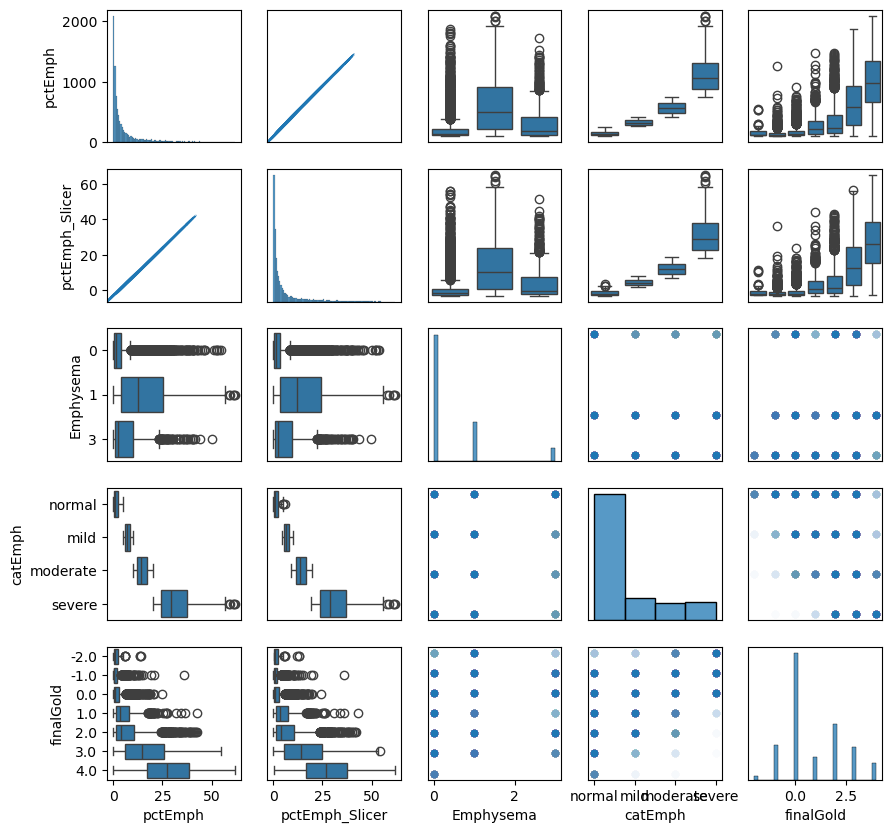

In [23]:
plot_columns = ['pctEmph', 'pctEmph_Slicer', 'Emphysema', 'catEmph', 'finalGold']
is_numeric = [True, True, False, False, False]

n_cols = len(plot_columns)
ax_height = 2
ax_width  = 2
alpha = 0.01

fig, ax = plt.subplots(n_cols, n_cols, figsize=(n_cols * ax_height, n_cols * ax_width))

for i, col_i in enumerate(plot_columns):
    for j, col_j in enumerate(plot_columns):
        
        # plot joint distribution
        if i == j:
            sns.histplot(df_clinical, x=col_i, ax=ax[i,j])
        elif is_numeric[i] and is_numeric[j]:
            sns.kdeplot(df_clinical, x=col_j, y=col_i, ax=ax[i,j])
        elif is_numeric[i]:
            sns.boxplot(df_clinical, x=col_j, y=col_i, orient='v', ax=ax[i,j])
        elif is_numeric[j]:
            sns.boxplot(df_clinical, x=col_j, y=col_i, orient='h', ax=ax[i,j])
        else:
            sns.scatterplot(df_clinical, x=col_j, y=col_i, alpha=alpha, ax=ax[i,j])

        if j == 0:
            ax[i,j].set_ylabel(col_i)
        else:
            ax[i,j].yaxis.set_visible(False)

        if i + 1 == len(plot_columns):
            ax[i,j].set_xlabel(col_j)
        else:
            ax[i,j].xaxis.set_visible(False)
        

<Axes: xlabel='pctEmph', ylabel='pctEmph_Slicer'>

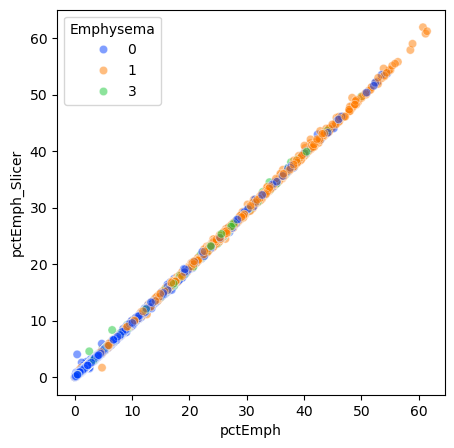

In [24]:
fig, ax = plt.subplots(figsize=(5,5))
sns.scatterplot(
    df_clinical,
    x=emph_pct_col_name,
    y=emph_pct2_col_name,
    hue=emph_cat_col_name,
    palette='bright',
    alpha=0.5
)

<Axes: xlabel='pctEmph', ylabel='Emphysema'>

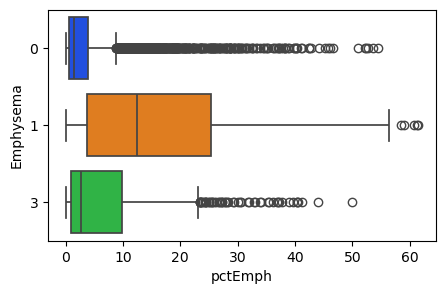

In [25]:
# plot distribution of percent emphysema x categorical emphysema
fig, ax = plt.subplots(figsize=(5,3))
sns.boxplot(
    df_clinical,
    x=emph_pct_col_name,
    y=emph_cat_col_name,
    hue=emph_cat_col_name,
    legend=False,
    orient='h',
    palette='bright',
    linewidth=1.25
)

In [26]:
df_clinical.groupby(emph_cat_col_name)[[emph_pct_col_name]].describe()

pctEmph                                                              \
            count       mean        std     min       25%      50%        75%   
Emphysema                                                                       
0          6228.0   3.426938   5.563375  0.0065  0.521575   1.4141   3.836625   
1          1922.0  15.917881  13.887227  0.0290  3.759200  12.4969  25.277125   
3           619.0   7.160943   9.355374  0.0285  0.903750   2.7198   9.853900   

                    
               max  
Emphysema           
0          54.5034  
1          61.4671  
3          49.9994

<Axes: xlabel='pctEmph', ylabel='pctEmph_Slicer'>

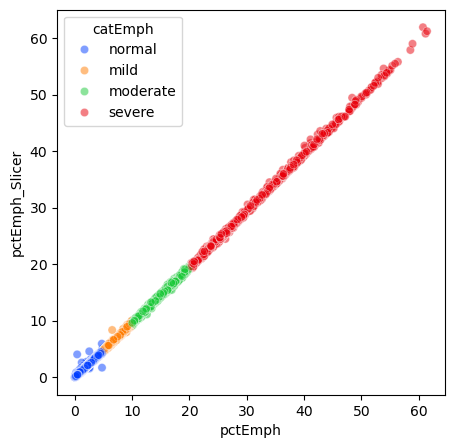

In [27]:
# plot distribution of percent emphysema x percent emphysema (Slicer) x categorical
fig, ax = plt.subplots(figsize=(5,5))
sns.scatterplot(
    df_clinical,
    x=emph_pct_col_name,
    y=emph_pct2_col_name,
    hue=emph_cat2_col_name,
    palette='bright',
    alpha=0.5
)

<Axes: xlabel='pctEmph', ylabel='catEmph'>

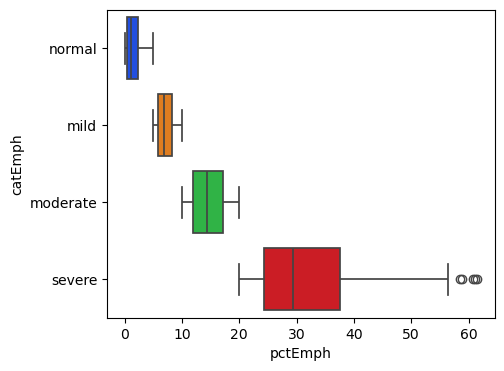

In [28]:
# plot distribution of percent emphysema x categorical emphysema
fig, ax = plt.subplots(figsize=(5,4))
sns.boxplot(
    df_clinical,
    x=emph_pct_col_name,
    y=emph_cat2_col_name,
    hue=emph_cat2_col_name,
    legend=False,
    orient='h',
    palette='bright',
    linewidth=1.25
)

In [29]:
df_clinical.groupby(emph_cat2_col_name)[[emph_pct_col_name]].describe()

/var/tmp/ipykernel_47104/1742194947.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_clinical.groupby(emph_cat2_col_name)[[emph_pct_col_name]].describe()


pctEmph                                                     \
           count       mean       std      min        25%       50%   
catEmph                                                               
normal    6004.0   1.501735  1.304045   0.0065   0.442675   1.04085   
mild      1056.0   7.105295  1.430290   5.0004   5.856825   6.87890   
moderate   831.0  14.543143  2.921632  10.0050  11.967500  14.34570   
severe     878.0  31.622775  8.877138  20.0083  24.250150  29.45750   

                              
                75%      max  
catEmph                       
normal     2.305575   4.9985  
mild       8.305250   9.9888  
moderate  17.086450  19.9899  
severe    37.588575  61.4671

<Axes: xlabel='pctEmph', ylabel='finalGold'>

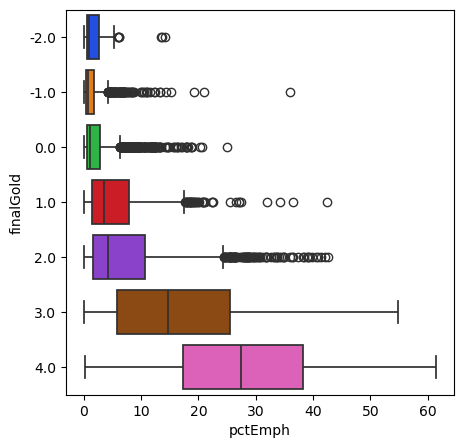

In [30]:
# plot distribution of GOLD score x percent emphysema
fig, ax = plt.subplots(figsize=(5,5))
sns.boxplot(
    df_clinical,
    x=emph_pct_col_name,
    y=gold_col_name,
    hue=gold_col_name,
    legend=False,
    orient='h',
    palette='bright',
    linewidth=1.25,
)

In [31]:
df_clinical.groupby(gold_col_name)[[emph_pct_col_name]].describe()

pctEmph                                                     \
            count       mean        std     min        25%       50%   
finalGold                                                              
-2.0        103.0   1.989315   2.589436  0.0747   0.496800   0.85520   
-1.0       1041.0   1.540240   2.414525  0.0065   0.290600   0.71210   
 0.0       3797.0   2.153543   2.662509  0.0130   0.472100   1.12770   
 1.0        687.0   5.452516   5.747787  0.0451   1.348650   3.54590   
 2.0       1668.0   7.500553   8.085869  0.0286   1.590450   4.24030   
 3.0        970.0  16.823912  12.576195  0.0481   5.818575  14.70065   
 4.0        503.0  27.452229  14.270381  0.1502  17.246650  27.33220   

                               
                 75%      max  
finalGold                      
-2.0        2.599250  14.1338  
-1.0        1.832700  35.9520  
 0.0        2.818900  24.9841  
 1.0        7.834700  42.3733  
 2.0       10.695875  42.6116  
 3.0       25.577325  54.7645  
 4.0       38.231200  61.4671

(0.0, 1.0)

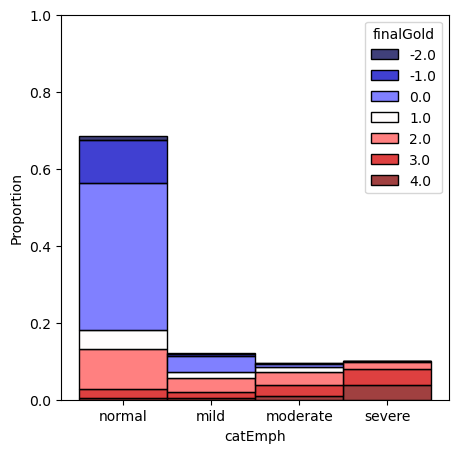

In [32]:
# plot distribution of GOLD score x emphysema category
fig, ax = plt.subplots(figsize=(5,5))
sns.histplot(
    df_clinical,
    x=emph_cat2_col_name,
    hue=gold_col_name,
    multiple='stack',
    palette='seismic',
    stat='proportion'
)
ax.set_ylim(0, 1)

(0.0, 160.0)

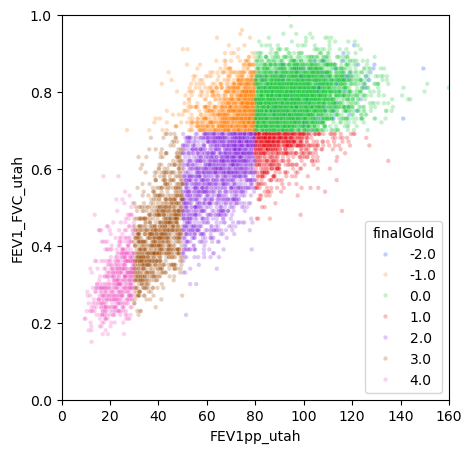

In [33]:
# plot distribution of FEV1/FVC x FEV1pp x GOLD score
fig, ax = plt.subplots(figsize=(5,5))
sns.scatterplot(
    df_clinical,
    x=fev_col_name,
    y=fev_fvc_col_name,
    hue=gold_col_name,
    palette='bright',
    alpha=0.25,
    s=10,
    ax=ax
)
ax.set_ylim(0, 1)
ax.set_xlim(0, 160)

(0.0, 160.0)

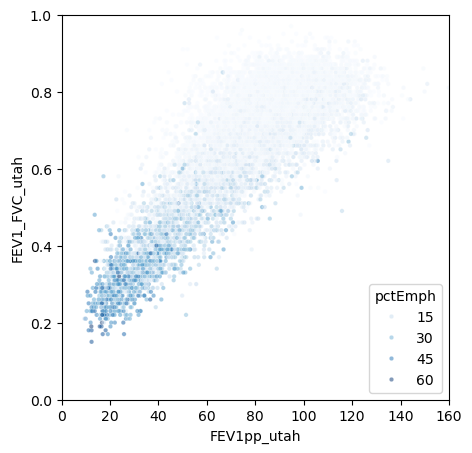

In [34]:
# plot distribution of FEV1/FVC x FEV1pp x percent emphysema
fig, ax = plt.subplots(figsize=(5,5))
sns.scatterplot(
    df_clinical,
    x=fev_col_name,
    y=fev_fvc_col_name,
    hue=emph_pct_col_name,
    palette='Blues',
    alpha=0.5,
    s=10
)
ax.set_ylim(0, 1)
ax.set_xlim(0, 160)

(0.0, 160.0)

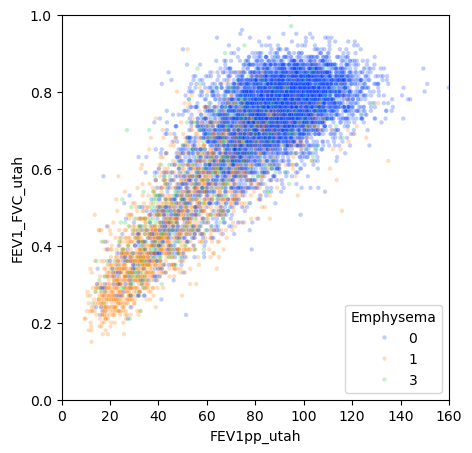

In [35]:
# plot distribution of FEV1/FVC x FEV1pp x emphysema variable
fig, ax = plt.subplots(figsize=(5,5))
sns.scatterplot(
    df_clinical,
    x=fev_col_name,
    y=fev_fvc_col_name,
    hue=emph_cat_col_name,
    palette='bright',
    alpha=0.25,
    s=10
)
ax.set_ylim(0, 1)
ax.set_xlim(0, 160)

(0.0, 160.0)

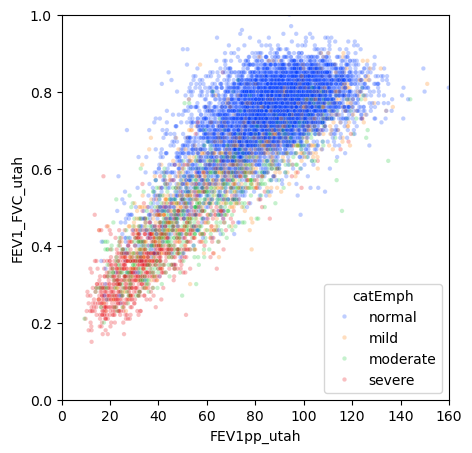

In [36]:
# plot distribution of FEV1/FVC x FEV1pp x emphysema category
fig, ax = plt.subplots(figsize=(5,5))
sns.scatterplot(
    df_clinical,
    x=fev_col_name,
    y=fev_fvc_col_name,
    hue=emph_cat2_col_name,
    palette='bright',
    alpha=0.25,
    s=10
)
ax.set_ylim(0, 1)
ax.set_xlim(0, 160)

In [37]:
df_clinical.groupby([emph_cat2_col_name, gold_col_name])[[subj_col_name]].nunique().unstack()

/var/tmp/ipykernel_47104/1847783562.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_clinical.groupby([emph_cat2_col_name, gold_col_name])[[subj_col_name]].nunique().unstack()


sid                               
finalGold -2.0 -1.0   0.0  1.0  2.0  3.0  4.0
catEmph                                      
normal      94  976  3349  429  907  213   36
mild         6   50   368  141  314  146   31
moderate     3   13    77   99  297  246   96
severe       0    2     3   18  150  365  340

# Filtering and stratified sampling

In [38]:
os.environ['PKG_CONFIG_PATH'] = '/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/pkgconfig'
sys.path.append('..')
%aimport project

In [39]:
# get subject ids that have valid image pair
valid_subjects = set()

for idx, row in df_clinical.iterrows():
    subject_id = row[subj_col_name]
    site_code  = row[site_col_name]
    visit = project.copdgene.COPDGeneVisit(data_root, subject_id, visit_name='Phase-1')
    if visit.has_valid_image_pair(variant='RAW', recon='STD', site_code=site_code):
        valid_subjects.add(subject_id)

len(valid_subjects)

File does not exist: /ocean/projects/asc170022p/shared/Data/COPDGene/Images/10006S/Phase-1/RAW/10006S_EXP_STD_BWH_COPD.nii.gz
File does not exist: /ocean/projects/asc170022p/shared/Data/COPDGene/Images/10092L/Phase-1/RAW/10092L_EXP_STD_NJC_COPD.nii.gz
File does not exist: /ocean/projects/asc170022p/shared/Data/COPDGene/Images/10146I/Phase-1/RAW/10146I_EXP_STD_COL_COPD.nii.gz
File does not exist: /ocean/projects/asc170022p/shared/Data/COPDGene/Images/10228K/Phase-1/RAW/10228K_EXP_STD_COL_COPD.nii.gz
File does not exist: /ocean/projects/asc170022p/shared/Data/COPDGene/Images/10282Q/Phase-1/RAW/10282Q_EXP_STD_COL_COPD.nii.gz
File does not exist: /ocean/projects/asc170022p/shared/Data/COPDGene/Images/10286Y/Phase-1/RAW/10286Y_EXP_STD_COL_COPD.nii.gz
File does not exist: /ocean/projects/asc170022p/shared/Data/COPDGene/Images/10324G/Phase-1/RAW/10324G_EXP_STD_COL_COPD.nii.gz
File does not exist: /ocean/projects/asc170022p/shared/Data/COPDGene/Images/10333H/Phase-1/RAW/10333H_EXP_STD_COL_COPD

8214

In [41]:
df_filtered = df_clinical[
    (df_clinical[subj_col_name].isin(valid_subjects)) &
    (df_clinical[gold_col_name] != -2)
]
df_filtered

sid ccenter kernel  Emphysema  pctEmph  pctEmph_Slicer  FEV1pp_utah  \
2      10005Q     NJC    STD          0   0.9819          0.8783        112.3   
7      10011L     BWH    STD          0   2.3425          2.2143         72.2   
9      10013P     BWH    STD          1   9.9594          9.4883         61.4   
12     10017X     BWH    STD          1  36.4779         35.8757         80.6   
13     10020M     BWH    STD          1  22.9852         21.9769         44.4   
...       ...     ...    ...        ...      ...             ...          ...   
10301  26180S     HAR    STD          0   0.1768          0.1710         90.9   
10302  26181U     UAB    STD          1  11.9066         11.6736         46.0   
10303  26182W     PIT    STD          0   0.5064          0.4673         81.5   
10304  26183Y     TXS    STD          0   0.4757          0.4274         94.8   
10305  26185C     TXS    STD          0   2.2792          2.1001         80.1   

       FVCpp_utah  FEV1_FVC_utah  finalGold   catEmph  
2           114.6           0.77        0.0    normal  
7            82.9           0.66        2.0    normal  
9           106.6           0.44        2.0      mild  
12          104.9           0.57        1.0    severe  
13           86.1           0.38        3.0    severe  
...           ...            ...        ...       ...  
10301        87.6           0.82        0.0    normal  
10302        64.6           0.55        3.0  moderate  
10303        86.5           0.74        0.0    normal  
10304        95.3           0.80        0.0    normal  
10305        90.9           0.70        0.0    normal  

[8112 rows x 11 columns]

In [43]:
df_sampled = df_filtered.groupby([emph_cat2_col_name], observed=True).sample(250, random_state=0)
df_sampled

sid ccenter kernel  Emphysema  pctEmph  pctEmph_Slicer  FEV1pp_utah  \
4242  16514P     TEM    STD          0   0.3373          0.3147         77.6   
7009  20748Q     UAB    STD          0   3.6045          3.4085         73.2   
637   11007Z     USD    STD          0   0.3126          0.2867         66.7   
3113  14771Z     HPR    STD          0   0.3160          0.2948         94.1   
2365  13651K     UIA    STD          0   2.0807          1.9551         85.1   
...      ...     ...    ...        ...      ...             ...          ...   
6867  20519B     DUK    STD          1  30.1942         29.6440         19.9   
1498  12294H     UAB    STD          1  40.3908         39.5845         43.3   
8410  23123R     TEM    STD          0  23.6838         22.7617         42.8   
4264  16546C     UIA    STD          1  42.6116         41.8307         58.6   
700   11099E     TXS    STD          0  28.6031         28.0289         52.3   

      FVCpp_utah  FEV1_FVC_utah  finalGold catEmph  
4242        88.9           0.71       -1.0  normal  
7009        75.8           0.75       -1.0  normal  
637        108.0           0.47        2.0  normal  
3113        97.0           0.73        0.0  normal  
2365        88.0           0.75        0.0  normal  
...          ...            ...        ...     ...  
6867        69.2           0.22        4.0  severe  
1498        86.0           0.37        3.0  severe  
8410        72.7           0.45        3.0  severe  
4264        99.6           0.43        2.0  severe  
700         96.0           0.41        2.0  severe  

[1000 rows x 11 columns]

In [44]:
sampled_ids = list(sorted(df_sampled[subj_col_name].unique()))
sampled_ids

['10017X',
 '10020M',
 '10031R',
 '10049K',
 '10056H',
 '10081G',
 '10096T',
 '10114V',
 '10124Y',
 '10127E',
 '10130T',
 '10153F',
 '10155J',
 '10179X',
 '10181K',
 '10196X',
 '10211T',
 '10212V',
 '10213X',
 '10217F',
 '10227I',
 '10233D',
 '10245K',
 '10261I',
 '10265Q',
 '10301U',
 '10314D',
 '10328O',
 '10332F',
 '10367Y',
 '10372R',
 '10395D',
 '10426O',
 '10432J',
 '10458B',
 '10469G',
 '10478H',
 '10481W',
 '10490X',
 '10502E',
 '10503G',
 '10507O',
 '10512H',
 '10523M',
 '10524O',
 '10539B',
 '10552T',
 '10560S',
 '10561U',
 '10564A',
 '10566E',
 '10567G',
 '10568I',
 '10571X',
 '10572Z',
 '10624S',
 '10634V',
 '10635X',
 '10641S',
 '10646C',
 '10663C',
 '10679R',
 '10699X',
 '10705S',
 '10709A',
 '10724W',
 '10728E',
 '10736D',
 '10761C',
 '10794R',
 '10806Y',
 '10815Z',
 '10817D',
 '10829K',
 '10842C',
 '10843E',
 '10849Q',
 '10880K',
 '10883Q',
 '10887Y',
 '10888A',
 '10908G',
 '10919L',
 '10947Q',
 '10961K',
 '10973R',
 '10975V',
 '10990R',
 '11005V',
 '11007Z',
 '11027F',

In [45]:
# save sampled subjects to new data file

new_data_root = pathlib.Path('/ocean/projects/asc170022p/mtragoza/lung-project/data/COPDGene')
new_data_file = new_data_root / 'sample1000_2025-07-17.csv'

df_sampled.to_csv(new_data_file, sep='\t', index=False)

# Preprocess images

In [59]:
%autoreload
dataset = project.copdgene.COPDGene(data_root, subject_ids=sampled_ids, visit_names=['Phase-1'])
dataset

COPDGene(data_root=/ocean/projects/asc170022p/shared/Data/COPDGene, #subjects=1000)

In [60]:
%autoreload
dataset[0][0].load_metadata_from_headers(variant='RAW', filters={'recon': 'STD'})

Index subject_id state recon site_code condition visit_name variant  \
0      0     10017X   EXP   STD       BWH      COPD    Phase-1     RAW   
1      1     10017X  INSP   STD       BWH      COPD    Phase-1     RAW   

                 image_name            shape                 resolution  
0   10017X_EXP_STD_BWH_COPD  (512, 512, 670)  (0.660156, 0.660156, 0.5)  
1  10017X_INSP_STD_BWH_COPD  (512, 512, 699)  (0.660156, 0.660156, 0.5)

In [ ]:
import SimpleITK as sitk

def resize_arrays(arrays, size):
    '''
    Resample arrays to the the same size, using the FOV of the first array.
    '''
    a = arrays[0]

    x_min = a.x.min().item()
    y_min = a.y.min().item()
    z_min = a.z.min().item()
    
    x_max = a.x.max().item()
    y_max = a.y.max().item()
    z_max = a.z.max().item()

    new_grid = xr.DataArray(
        data=np.zeros(size),
        dims=['x', 'y', 'z'],
        coords={
            'x': np.linspace(x_min, x_max, size[0]),
            'y': np.linspace(y_min, y_max, size[1]),
            'z': np.linspace(z_min, z_max, size[2]),
        }
    )
    transform = sitk.Transform(3, sitk.sitkIdentity)

    new_arrays = []
    for array in arrays:
        print(f'Resizing {array.name}')
        new_array = project.registration.transform_array(
            array, new_grid, transform
        )
        new_arrays.append(new_array)

    return new_arrays


In [61]:
new_dataset = project.copdgene.COPDGene(new_data_root, subject_ids=sampled_ids, visit_names=['Phase-1'])
new_dataset

COPDGene(data_root=/ocean/projects/asc170022p/mtragoza/lung-project/data/COPDGene, #subjects=1000)

In [62]:
%%time
# resize raw images for all sample subjects and save in new data root in my project dir

errors = []
for row in tqdm.tqdm(df_sampled.itertuples(), total=len(df_sampled)):
    visit = project.copdgene.COPDGeneVisit(data_root, row.sid, visit_name='Phase-1')
    imgs = visit.load_image_pair(variant='RAW', recon='STD', site_code=site_code)
    resized = resize_xarrays(xarrays)
    ...
    
for i in range(len(dataset)):
    for j in range(len(dataset[i])):
        visit = dataset[i][j]
        new_visit = new_dataset[i][j]
        print((i,j), visit.subject_id, visit.visit_name)
        try:
            images = visit.load_images(variant='RAW', filters={'recon': 'STD'})
            images = resize_arrays(images, size=(256, 256, 256))     
            new_visit.save_images('Resized', images)
        except Exception as e:
            print(e, file=sys.stderr)


(0, 0) 10017X Phase-1
(1, 0) 10020M Phase-1
(2, 0) 10031R Phase-1
(3, 0) 10049K Phase-1
(4, 0) 10056H Phase-1
(5, 0) 10081G Phase-1
(6, 0) 10096T Phase-1
(7, 0) 10114V Phase-1
(8, 0) 10124Y Phase-1
(9, 0) 10127E Phase-1
(10, 0) 10130T Phase-1
(11, 0) 10153F Phase-1
(12, 0) 10155J Phase-1
(13, 0) 10179X Phase-1
(14, 0) 10181K Phase-1
(15, 0) 10196X Phase-1
(16, 0) 10211T Phase-1
(17, 0) 10212V Phase-1
(18, 0) 10213X Phase-1
(19, 0) 10217F Phase-1
(20, 0) 10227I Phase-1
(21, 0) 10233D Phase-1
(22, 0) 10245K Phase-1
(23, 0) 10261I Phase-1
(24, 0) 10265Q Phase-1
(25, 0) 10301U Phase-1
(26, 0) 10314D Phase-1
(27, 0) 10328O Phase-1
(28, 0) 10332F Phase-1
(29, 0) 10367Y Phase-1
(30, 0) 10372R Phase-1
(31, 0) 10395D Phase-1
(32, 0) 10426O Phase-1
(33, 0) 10432J Phase-1
(34, 0) 10458B Phase-1
(35, 0) 10469G Phase-1
(36, 0) 10478H Phase-1
(37, 0) 10481W Phase-1
(38, 0) 10490X Phase-1
(39, 0) 10502E Phase-1
(40, 0) 10503G Phase-1
(41, 0) 10507O Phase-1
(42, 0) 10512H Phase-1
(43, 0) 10523M Phase-

COPDGeneVisit.load_images() got an unexpected keyword argument 'variant'
COPDGeneVisit.load_images() got an unexpected keyword argument 'variant'
COPDGeneVisit.load_images() got an unexpected keyword argument 'variant'
COPDGeneVisit.load_images() got an unexpected keyword argument 'variant'
COPDGeneVisit.load_images() got an unexpected keyword argument 'variant'
COPDGeneVisit.load_images() got an unexpected keyword argument 'variant'
COPDGeneVisit.load_images() got an unexpected keyword argument 'variant'
COPDGeneVisit.load_images() got an unexpected keyword argument 'variant'
COPDGeneVisit.load_images() got an unexpected keyword argument 'variant'
COPDGeneVisit.load_images() got an unexpected keyword argument 'variant'
COPDGeneVisit.load_images() got an unexpected keyword argument 'variant'
COPDGeneVisit.load_images() got an unexpected keyword argument 'variant'
COPDGeneVisit.load_images() got an unexpected keyword argument 'variant'
COPDGeneVisit.load_images() got an unexpected keywo

In [71]:
def xview(image, **kwargs):
    return project.visual.XArrayViewer(image, **kwargs)


In [51]:
images = new_dataset[0][0].load_images('Resized')

Loading /ocean/projects/asc170022p/mtragoza/lung-project/data/COPDGene/Images/22957J/Phase-1/Resized/22957J_EXP_SHARP_AVA_COPD.nii.gz
/ocean/projects/asc170022p/mtragoza/lung-project/data/COPDGene/Images/22957J/Phase-1/Resized/22957J_EXP_SHARP_AVA_COPD.nii.gz (256, 256, 256)
Loading /ocean/projects/asc170022p/mtragoza/lung-project/data/COPDGene/Images/22957J/Phase-1/Resized/22957J_EXP_STD_AVA_COPD.nii.gz
/ocean/projects/asc170022p/mtragoza/lung-project/data/COPDGene/Images/22957J/Phase-1/Resized/22957J_EXP_STD_AVA_COPD.nii.gz (256, 256, 256)
Loading /ocean/projects/asc170022p/mtragoza/lung-project/data/COPDGene/Images/22957J/Phase-1/Resized/22957J_INSP_SHARP_AVA_COPD.nii.gz
/ocean/projects/asc170022p/mtragoza/lung-project/data/COPDGene/Images/22957J/Phase-1/Resized/22957J_INSP_SHARP_AVA_COPD.nii.gz (256, 256, 256)
Loading /ocean/projects/asc170022p/mtragoza/lung-project/data/COPDGene/Images/22957J/Phase-1/Resized/22957J_INSP_STD_AVA_COPD.nii.gz
/ocean/projects/asc170022p/mtragoza/lung-

interactive(children=(Output(),), _dom_classes=('widget-interact',))

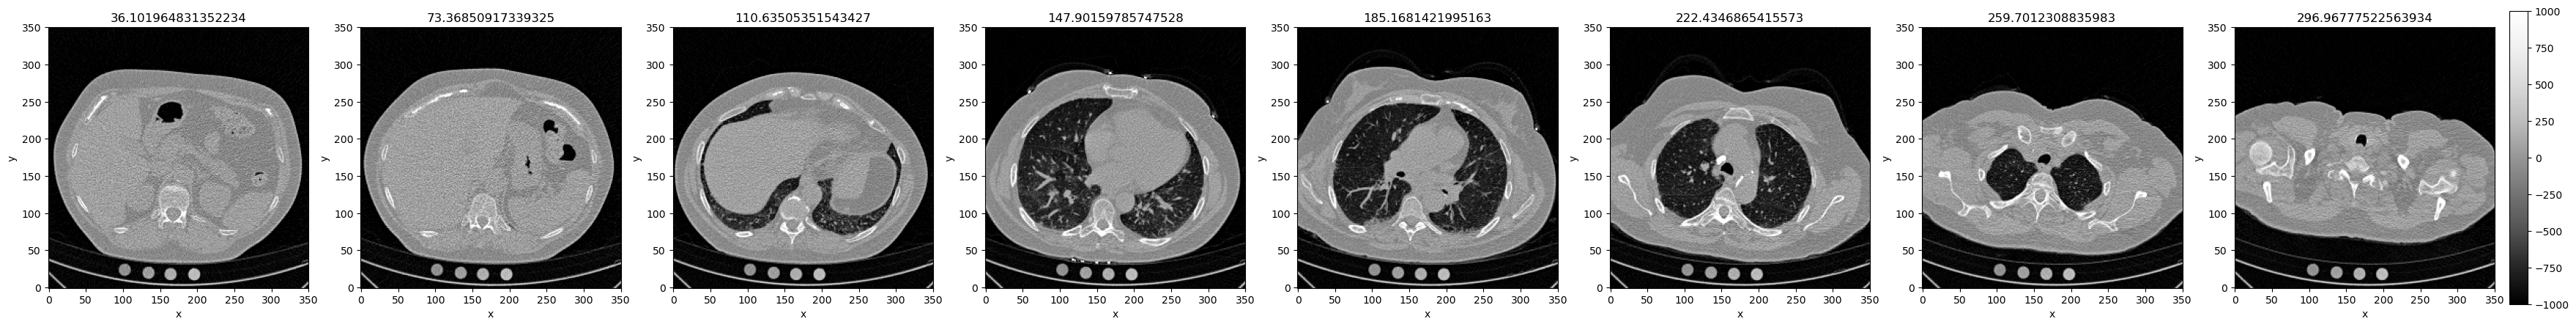

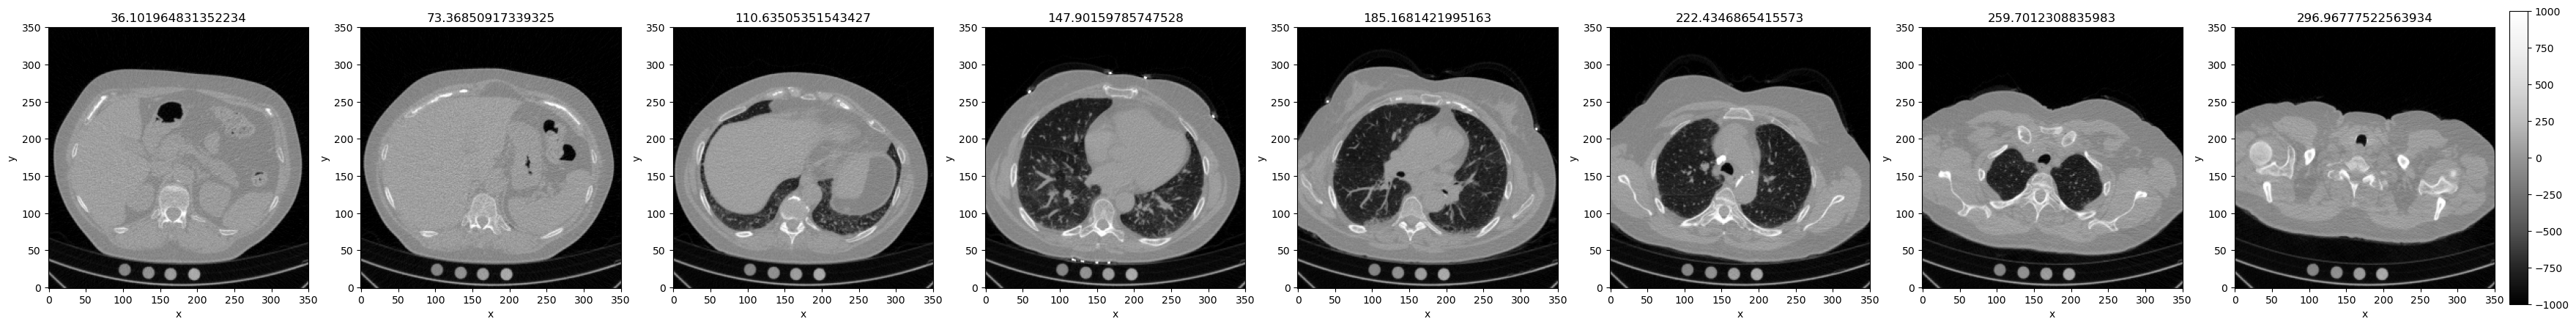

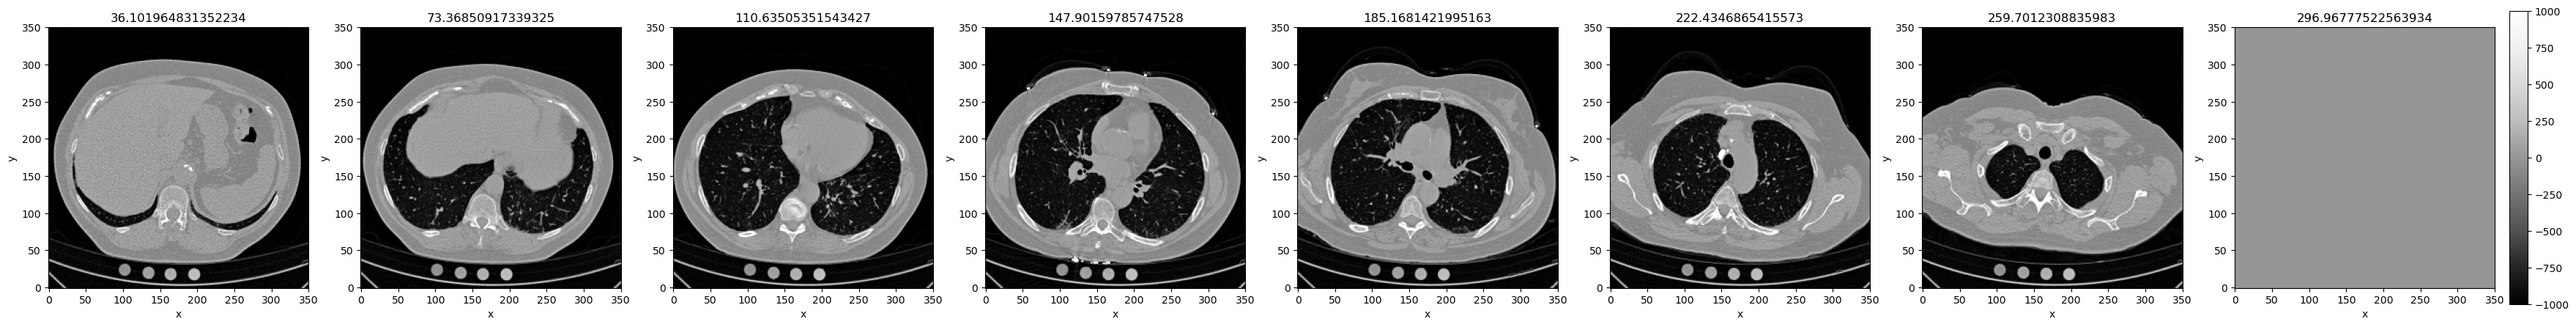

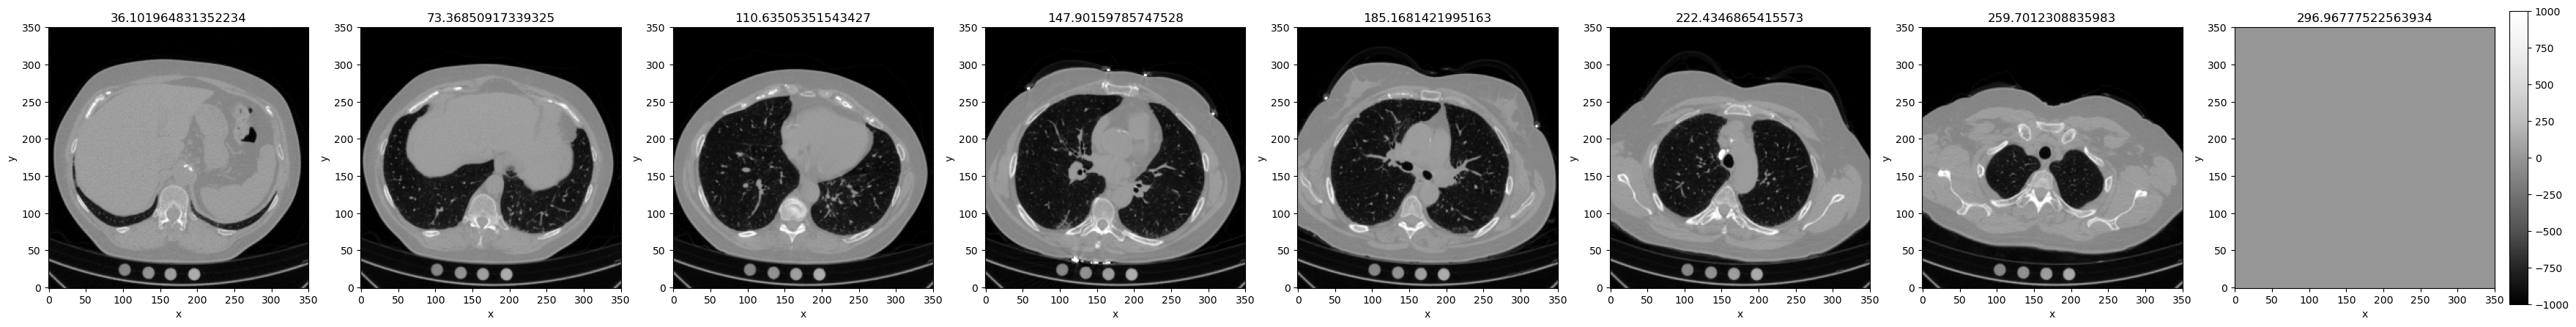

In [68]:
%autoreload
xview(images[0][:,:,31::32], cmap='Greys_r', vmin=-1000, vmax=1000, col='z', space=(0,0.2))
xview(images[1][:,:,31::32], cmap='Greys_r', vmin=-1000, vmax=1000, col='z', space=(0,0.2))
xview(images[2][:,:,31::32], cmap='Greys_r', vmin=-1000, vmax=1000, col='z', space=(0,0.2))
xview(images[3][:,:,31::32], cmap='Greys_r', vmin=-1000, vmax=1000, col='z', space=(0,0.2))